In [1]:
cd ..

/Users/yanndubois/Desktop/GitHub/alpaca_eval


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [3]:
from alpaca_eval import utils, metrics, annotators, constants, analyze, plotting

analyzer = analyze.Analyzer()

/Users/yanndubois/opt/anaconda3/envs/alpaca_eval/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset alpaca_eval (/Users/yanndubois/.cache/huggingface/datasets/tatsu-lab___alpaca_eval/alpaca_farm_human_crossannotations/1.0.0/eb179702dfcb9c2dc3d0a11e9b6a418834e691c8f5bc32cdec6c83611ecf38fc)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 227.94it/s]
Found cached dataset alpaca_eval (/Users/yanndubois/.cache/huggingface/datasets/tatsu-lab___alpaca_eval/alpaca_farm_human_annotations/1.0.0/eb179702dfcb9c2dc3d0a11e9b6a418834e691c8f5bc32cdec6c83611ecf38fc)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████

In [4]:
df_annotations = analyze.get_annotations(analyzer, annotators.PairwiseAnnotator, 
                                          annotators_config="claude")

INFO:root:Creating the annotator from `claude`.
INFO:root:Saving annotations to `/Users/yanndubois/Desktop/GitHub/alpaca_eval/src/alpaca_eval/evaluators_configs/claude/annotations_seed0_configs.json`.
INFO:root:Loading all annotations from /Users/yanndubois/Desktop/GitHub/alpaca_eval/src/alpaca_eval/evaluators_configs/claude/annotations_seed0_configs.json.
INFO:root:Annotating 3883 examples with claude
INFO:root:Using `anthropic_completions` on 3883 prompts using claude-v1.
INFO:root:Kwargs to completion: {'model': 'claude-v1', 'max_tokens': 50, 'temperature': 0}
prompts:  29%|██████████████████████████████████████▌                                                                                                | 1108/3883 [03:14<06:28,  7.15it/s]WARNING:root:('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')). 
Retrying...
Retrying...
Retrying...
prompts: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████

In [11]:
from alpaca_eval import utils, metrics, annotators, constants, analyze
import pandas as pd

In [12]:
auto_leaderboard = df_annotations.groupby("generator")["preference"].apply(metrics.pairwise_to_winrate).reset_index().pivot(columns="level_1", index='generator', values='preference')
auto_leaderboard = auto_leaderboard.sort_values(by="win_rate", ascending=False)


INFO:root:drop 2 outputs that are not[0, 1, 2]


In [13]:
human_leaderboard = analyzer.df_gold_annotations.groupby("generator")["preference"].apply(metrics.pairwise_to_winrate).reset_index().pivot(columns="level_1", index='generator', values='preference')
human_leaderboard = human_leaderboard.sort_values(by="win_rate", ascending=False)


In [14]:
human_leaderboard

level_1,n_draws,n_total,n_wins,n_wins_base,standard_error,win_rate
generator,,,,,,
GPT-4,16.0,805.0,554.0,235.0,1.599801,69.813665
GPT-4 300 characters,17.0,805.0,470.0,318.0,1.712579,59.440994
"AlpacaFarm PPO human (10k, step 40)",7.0,805.0,440.0,358.0,1.746468,55.093168
ChatGPT,11.0,805.0,420.0,374.0,1.748374,52.857143
"AlpacaFarm PPO human (10k, step 80)",5.0,805.0,410.0,390.0,1.757333,51.242236
"AlpacaFarm PPO human (10k, step 200)",8.0,805.0,406.0,391.0,1.754272,50.931677
AlpacaFarm best-of-16 human,8.0,805.0,404.0,393.0,1.754415,50.683230
"AlpacaFarm PPO sim (gpt4 greedy, step 30)",17.0,804.0,396.0,391.0,1.745673,50.310945
AlpacaFarm best-of-4 human,14.0,805.0,397.0,394.0,1.747951,50.186335


In [15]:
auto_leaderboard

level_1,n_draws,n_total,n_wins,n_wins_base,standard_error,win_rate
generator,,,,,,
GPT-4,16.0,805.0,630.0,159.0,1.408254,79.254658
GPT-4 300 characters,17.0,805.0,539.0,249.0,1.624883,68.012422
ChatGPT,11.0,805.0,487.0,307.0,1.706311,61.180124
"AlpacaFarm PPO sim (gpt4 greedy 20k, step 350)",18.0,804.0,458.0,328.0,1.721113,58.084577
"AlpacaFarm PPO human (10k, step 40)",7.0,805.0,456.0,342.0,1.737830,57.080745
AlpacaFarm PPO sim (step 40),1.0,805.0,457.0,347.0,1.745718,56.832298
"AlpacaFarm PPO sim (gpt4 greedy, step 30)",17.0,804.0,445.0,342.0,1.731011,56.405473
AlpacaFarm best-of-128 human,2.0,805.0,445.0,358.0,1.750831,55.403727
"AlpacaFarm PPO human (10k, step 80)",5.0,805.0,421.0,379.0,1.755470,52.608696


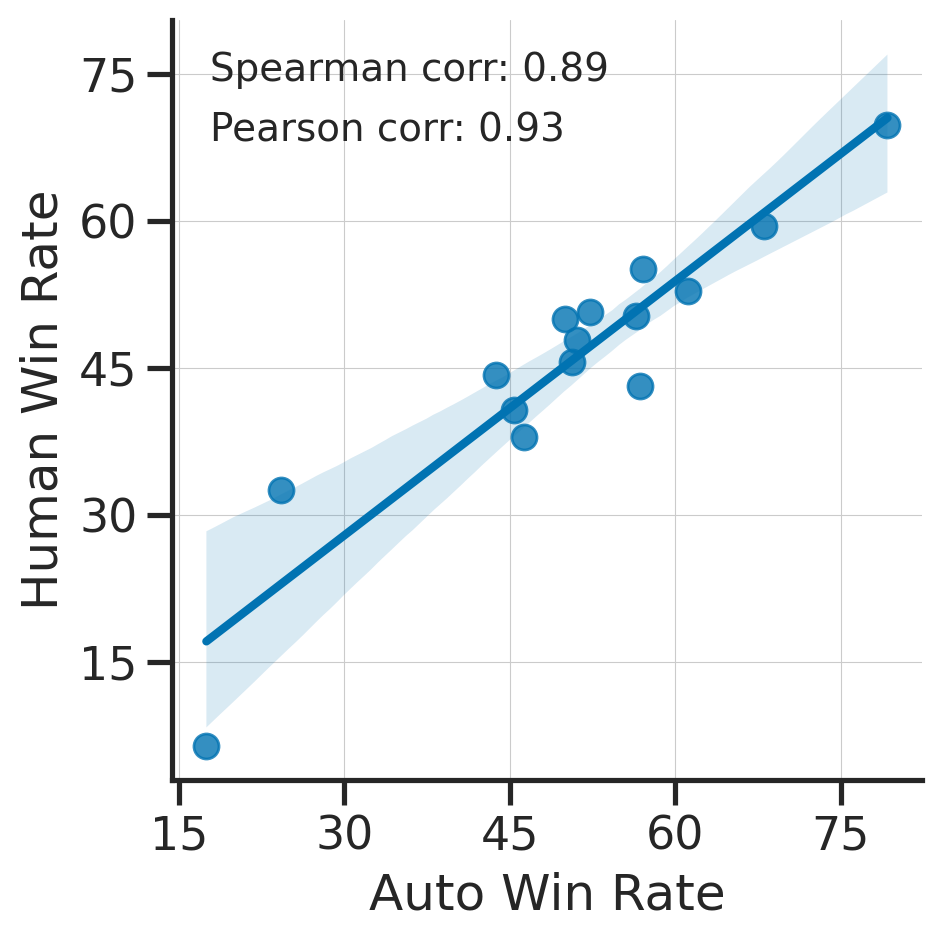

In [16]:
g = plotting.plot_winrate_correlations(human_leaderboard, auto_leaderboard)